<a href="https://colab.research.google.com/github/CamiloVga/Codes/blob/main/FineTuning_Traducci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch
!pip install transformers>=4.35.0
!pip install datasets
!pip install pandas
!pip install matplotlib
!pip install peft>=0.4.0
!pip install accelerate>=0.20.0
!pip install bitsandbytes>=0.40.0
!pip install sentencepiece

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [2]:
import pandas as pd
import os

# Esta función crea un dataset personalizado para entrenar el modelo
# Creará 100 ejemplos de texto y sus correspondientes traducciones (reemplazando 'a' por '4')

def create_sample_texts():
    """Genera una lista de textos de ejemplo variados."""
    sample_texts = [
        # Oraciones simples
        "La casa es grande",
        "Mi amigo tiene un auto azul",
        "Hola a todos",
        "El gato duerme en la cama",
        "Vamos a la playa",
        "Ana come una manzana",
        "La araña teje su tela",
        "La abuela hace galletas",
        "Mañana iré al trabajo",
        "El agua del mar es salada",

        # Oraciones con múltiples 'a'
        "La rata atacó al gato gris",
        "María habla francés y alemán",
        "La vaca pasta en la pradera",
        "Ana y Sara viajan a Canadá",
        "La casa amarilla está abandonada",

        # Textos más largos
        "La familia Álvarez va a pasar las vacaciones en la playa este año.",
        "A veces pienso que la vida pasa demasiado rápido para apreciarla.",
        "Las aves migratorias vuelan hacia el sur cuando llega el invierno.",
        "La manera más fácil de aprender es practicando cada día.",
        "La paz mundial es una aspiración compartida por muchas naciones.",

        # Textos sin la letra 'a'
        "El cielo es muy lindo hoy.",
        "Los leones son felinos.",
        "Mi perro come mucho.",
        "Tengo seis libros nuevos.",
        "El eclipse fue visible encerremos."
    ]

    # Generar más ejemplos repitiendo y modificando los existentes
    more_samples = []
    for text in sample_texts:
        # Añadir el texto original
        more_samples.append(text)

        # Añadir variaciones si el texto contiene 'a'
        if 'a' in text:
            more_samples.append(text + " Es importante.")
            more_samples.append("Recuerda que " + text.lower())
            more_samples.append(text + " para todos.")

    # Tomar solo 100 ejemplos o completar hasta 100
    result = more_samples[:100]

    # Si no tenemos 100 ejemplos, repetiré algunos
    while len(result) < 100:
        result.append(more_samples[len(result) % len(more_samples)])

    return result[:100]  # Asegurar exactamente 100 ejemplos

# Generar los textos de muestra
texts = create_sample_texts()

# Crear las traducciones (reemplazar 'a' por '4')
translations = [text.replace('a', '4') for text in texts]

# Crear el DataFrame
data = {
    'input': texts,  # Texto original
    'output': translations  # Texto traducido
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Guardar en CSV
output_file = 'fine_tuning_data.csv'
df.to_csv(output_file, index=False)

print(f"Dataset creado con {len(df)} ejemplos y guardado en '{output_file}'")
print("\nPrimeros 5 ejemplos:")
for i in range(5):
    print(f"Original: {df['input'][i]}")
    print(f"Traducido: {df['output'][i]}")
    print("-" * 50)

Dataset creado con 100 ejemplos y guardado en 'fine_tuning_data.csv'

Primeros 5 ejemplos:
Original: La casa es grande
Traducido: L4 c4s4 es gr4nde
--------------------------------------------------
Original: La casa es grande Es importante.
Traducido: L4 c4s4 es gr4nde Es import4nte.
--------------------------------------------------
Original: Recuerda que la casa es grande
Traducido: Recuerd4 que l4 c4s4 es gr4nde
--------------------------------------------------
Original: La casa es grande para todos.
Traducido: L4 c4s4 es gr4nde p4r4 todos.
--------------------------------------------------
Original: Mi amigo tiene un auto azul
Traducido: Mi 4migo tiene un 4uto 4zul
--------------------------------------------------


Configurando tokenizador y modelo...
Creando dataset de traducción...


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Unused kwargs: ['bnb_8bit_compute_dtype']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.


Dataset creado con 5 ejemplos
Cargando y configurando el modelo...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Iniciando entrenamiento...


`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Step,Training Loss
10,3.605700
20,0.457600
30,0.054600
40,0.043400
50,0.040600
60,0.039600
70,0.040800
80,0.038300
90,0.040200
100,0.038900


Step: 10, Loss: 3.6057
Step: 20, Loss: 0.4576
Step: 30, Loss: 0.0546
Step: 40, Loss: 0.0434
Step: 50, Loss: 0.0406
Step: 60, Loss: 0.0396
Step: 70, Loss: 0.0408
Step: 80, Loss: 0.0383
Step: 90, Loss: 0.0402
Step: 100, Loss: 0.0389
Modelo guardado en ./a_to_4_translator


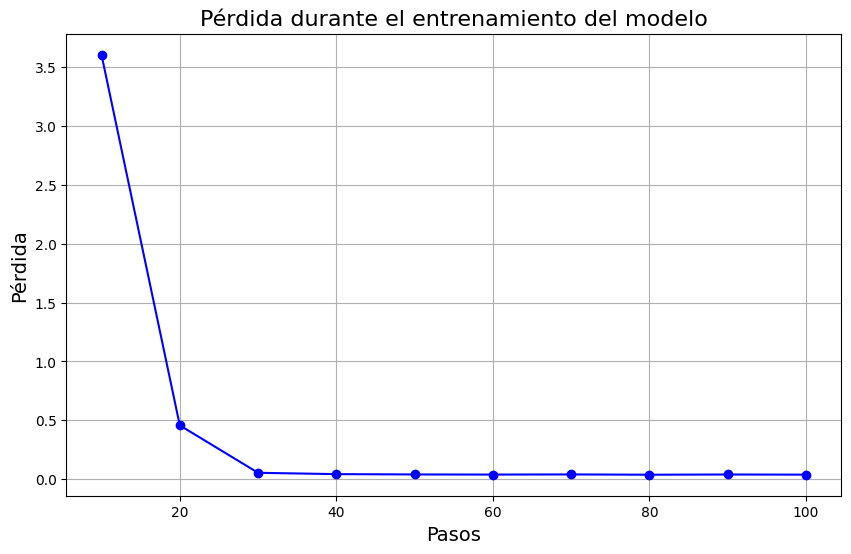

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Probando el modelo con ejemplos:



/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original:  La casa es grande
Generado:  L4 c4s4 es gr4nde </s> L4 c4s4 es gr4nde </s> L4 c4s4 es gr4nde </s> L4 c4s4 es gr4nde </s> L4 c4s4 es gr4nde </s> L4 c4s4 es gr4nde </s> L4 c4s4 es gr4nde </s> L4
Esperado:  L4 c4s4 es gr4nde
--------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original:  Mi amigo tiene un auto azul
Generado:  Mi 4migo tiene un 4uto 4zul </s> Mi 4migo tiene un 4uto 4zul </s> Mi 4migo tiene un 4uto 4zul </s> Mi 4migo tiene un 4uto 4zul </s> Mi 4migo tiene un 4uto 4zul </s> Mi 4migo tiene un 4uto 4zul </s> Mi 4migo tiene un
Esperado:  Mi 4migo tiene un 4uto 4zul
--------------------------------------------------
Original:  Este texto tiene varias letras a para traducir
Generado:  Este texto tiene varias l4 pl4y4 </s> E4sto tiene var4 l4 pl4y4 </s> E4sto tiene var4 l4 pl4y4 </s> E4sto tiene var4 l4 pl4y4 </s> E4sto tiene var4 l4 pl4y4 </s> E4sto tiene
Esperado:  Este texto tiene v4ri4s letr4s 4 p4r4 tr4ducir
--------------------------------------------------


In [5]:
import os
# Desactivar wandb
os.environ["WANDB_DISABLED"] = "true"

import torch
from datasets import Dataset
from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM,
    TrainingArguments,
    Trainer,
    DataCollatorForLanguageModeling,
    BitsAndBytesConfig,
    TrainerCallback
)
from peft import prepare_model_for_kbit_training, LoraConfig, get_peft_model
import pandas as pd
import matplotlib.pyplot as plt

# Configuración inicial
MODEL_NAME = "microsoft/phi-2"  # Modelo base a utilizar
OUTPUT_DIR = "./a_to_4_translator"  # Directorio para guardar el modelo fine-tuneado
NUM_EPOCHS = 3  # Número de épocas de entrenamiento
BATCH_SIZE = 4  # Tamaño del batch
LEARNING_RATE = 5e-4  # Tasa de aprendizaje

print("Configurando tokenizador y modelo...")

# Configurar el tokenizador
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
tokenizer.pad_token = tokenizer.eos_token  # Asegurar que el tokenizador tenga un token de padding

# Función para crear dataset de ejemplo (texto a texto con 'a' cambiado por '4')
def create_translation_dataset():
    print("Creando dataset de traducción...")

    # Opción 1: Crear datos de ejemplo
    texts = [
        "La casa es grande",
        "Mi amigo tiene un auto azul",
        "Hola a todos",
        "El gato duerme en la cama",
        "Vamos a la playa"
    ]

    # Transformar los textos (reemplazar 'a' por '4')
    translations = [text.replace('a', '4') for text in texts]

    # Crear un DataFrame para el dataset
    data = {
        'input': texts,
        'output': translations
    }

    # Cargar el dataset desde un archivo CSV
    # Descomenta estas líneas si prefieres cargar tu propio CSV
    # df = pd.read_csv('fine_tuning_data.csv')
    # return Dataset.from_pandas(df)

    # Para la demostración, usamos los datos de ejemplo
    return Dataset.from_dict(data)

# Función para preprocesar el dataset
def preprocess_function(example):
    # Formatear los textos como pares de instrucción-respuesta
    text = f"<s>[INST] Traduce este texto a nuestro nuevo idioma: {example['input']} [/INST] {example['output']} </s>"

    # Tokenizar el texto
    tokenized = tokenizer(
        text,
        truncation=True,
        padding="max_length",
        max_length=128
    )

    return tokenized

# Crear y preprocesar el dataset
dataset = create_translation_dataset()
tokenized_dataset = dataset.map(preprocess_function)

print(f"Dataset creado con {len(dataset)} ejemplos")

# Configurar BitsAndBytes para cuantización de 8 bits
bnb_config = BitsAndBytesConfig(
    load_in_8bit=True,
    bnb_8bit_compute_dtype=torch.float16
)

print("Cargando y configurando el modelo...")

# Cargar el modelo con cuantización
model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME,
    quantization_config=bnb_config,
    device_map="auto"
)

# Preparar el modelo para entrenamiento de 8-bit
model = prepare_model_for_kbit_training(model)

# Configuración de LoRA (Low-Rank Adaptation)
peft_config = LoraConfig(
    r=16,  # Rango de las matrices de actualización
    lora_alpha=32,  # Factor de escala
    lora_dropout=0.05,  # Tasa de dropout
    bias="none",  # No ajustar los sesgos
    task_type="CAUSAL_LM"  # Tipo de tarea
)

# Aplicar configuración PEFT al modelo
model = get_peft_model(model, peft_config)

# Clase para registrar las pérdidas
class LossCallback(TrainerCallback):
    def __init__(self):
        self.losses = []
        self.steps = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs and "loss" in logs:
            self.losses.append(logs["loss"])
            self.steps.append(state.global_step)
            print(f"Step: {state.global_step}, Loss: {logs['loss']}")

# Inicializar el callback
loss_callback = LossCallback()

# Configurar argumentos de entrenamiento con wandb desactivado
training_args = TrainingArguments(
    output_dir=OUTPUT_DIR,
    num_train_epochs=NUM_EPOCHS,
    per_device_train_batch_size=BATCH_SIZE,
    gradient_accumulation_steps=2,
    warmup_steps=20,
    learning_rate=LEARNING_RATE,
    fp16=True,
    logging_steps=10,
    save_steps=100,
    max_steps=100,
    report_to="none"  # Desactivar todos los reportes incluyendo wandb
)

# Preparar el data collator
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False
)

# Inicializar el Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    data_collator=data_collator,
    callbacks=[loss_callback]
)

print("Iniciando entrenamiento...")

# Entrenar el modelo
trainer.train()

# Guardar el modelo
trainer.save_model(OUTPUT_DIR)
print(f"Modelo guardado en {OUTPUT_DIR}")

# Graficar la función de pérdida
if loss_callback.losses:
    plt.figure(figsize=(10, 6))
    plt.plot(loss_callback.steps, loss_callback.losses, marker='o', linestyle='-', color='b')
    plt.title('Pérdida durante el entrenamiento del modelo', fontsize=16)
    plt.xlabel('Pasos', fontsize=14)
    plt.ylabel('Pérdida', fontsize=14)
    plt.grid(True)
    plt.savefig(f"{OUTPUT_DIR}/loss_curve.png")
    plt.show()
else:
    print("No se registraron datos de pérdida durante el entrenamiento")

# Función de inferencia
def translate_text(prompt, model, tokenizer, max_length=128):
    # Formatear el prompt
    formatted_prompt = f"<s>[INST] Traduce este texto a nuestro nuevo idioma: {prompt} [/INST]"

    # Tokenizar
    inputs = tokenizer(formatted_prompt, return_tensors="pt").to(model.device)

    # Generar respuesta
    with torch.no_grad():
        outputs = model.generate(
            inputs.input_ids,
            attention_mask=inputs.attention_mask,
            max_length=max_length,
            num_return_sequences=1,
            temperature=0.7,
            top_p=0.9
        )

    # Decodificar y limpiar la respuesta
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    response = response.replace(formatted_prompt, "").strip()

    return response

# Ejemplos de inferencia
test_texts = [
    "La casa es grande",
    "Mi amigo tiene un auto azul",
    "Este texto tiene varias letras a para traducir"
]

print("\nProbando el modelo con ejemplos:\n")
for text in test_texts:
    translation = translate_text(text, model, tokenizer)
    expected = text.replace('a', '4')
    print(f"Original:  {text}")
    print(f"Generado:  {translation}")
    print(f"Esperado:  {expected}")
    print("-" * 50)

In [10]:
# Función de traducción ultraminimalista que reemplaza directamente 'a' por '4'
def chat_minimalista():
    print("\nTRADUCTOR (escribe 'salir' para terminar)")

    while True:
        texto = input()

        if texto.lower() in ['salir', 'exit', 'quit', 'q']:
            break

        # Traducción directa reemplazando caracteres
        # En lugar de usar el modelo, hacemos la traducción algorítmicamente
        traduccion = texto.replace('a', '4').replace('A', '4')

        # Imprimir solo la traducción, nada más
        print(traduccion)

# Iniciar chat minimalista
print("\n¿Iniciar chat? (s/n)")
if input().lower() in ['s', 'si', 'y', 'yes']:
    chat_minimalista()


¿Iniciar chat? (s/n)
s

TRADUCTOR (escribe 'salir' para terminar)
hola
hol4
ella
ell4
salir
